In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Lab Exercise 1: Understanding PCA with a Simple Dataset

In [2]:
df = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = pd.DataFrame(df.data, columns=df.feature_names)
y = pd.Series(df.target)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000 

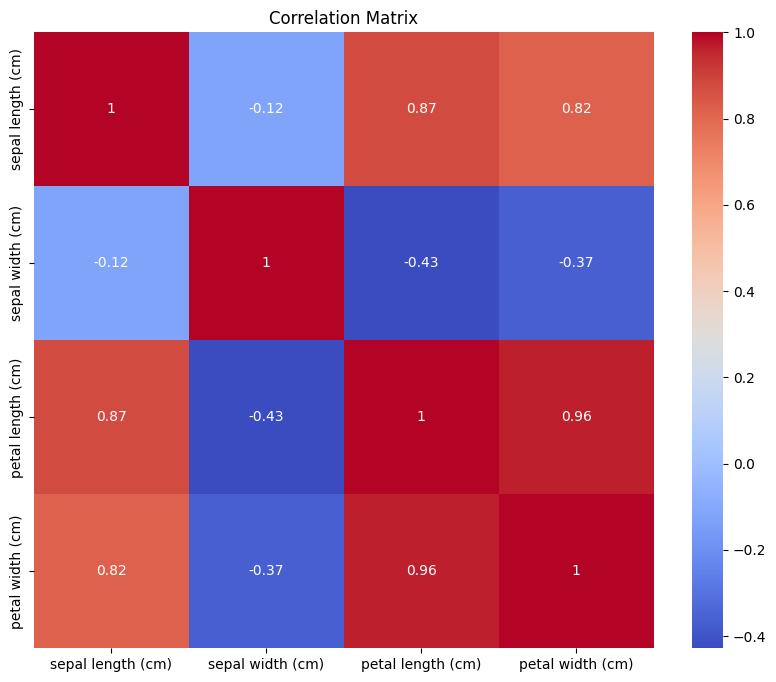

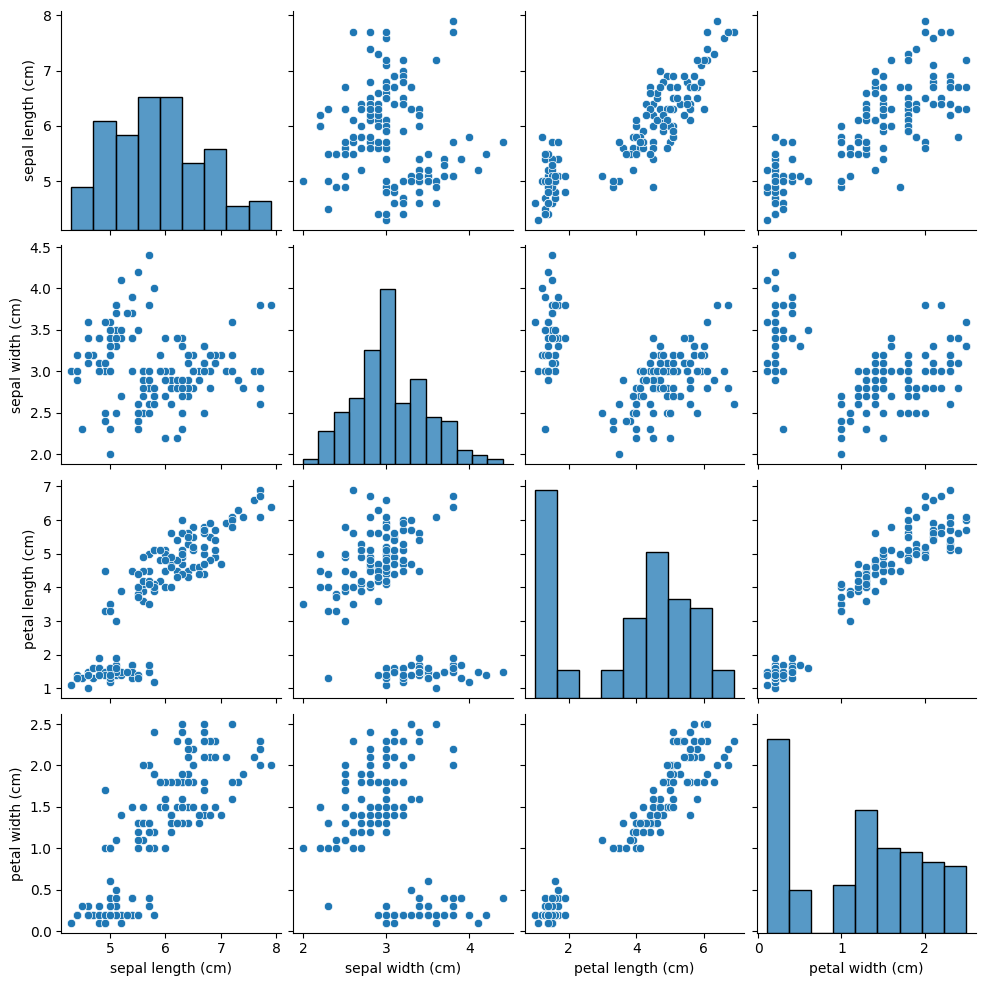

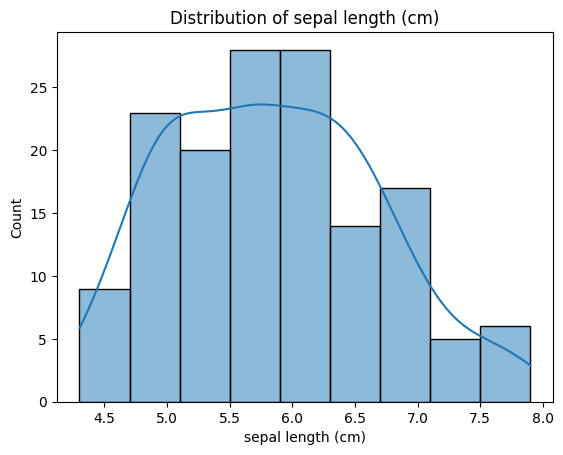

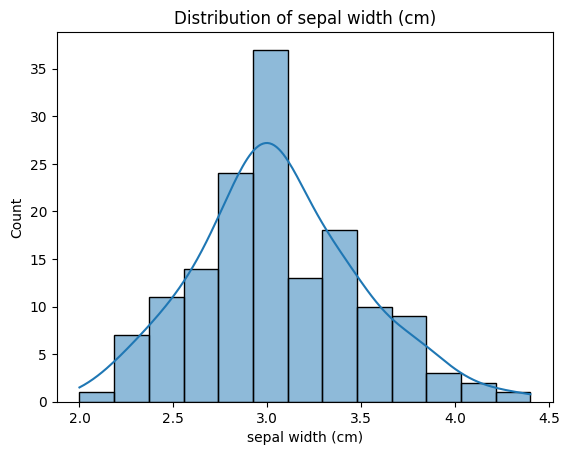

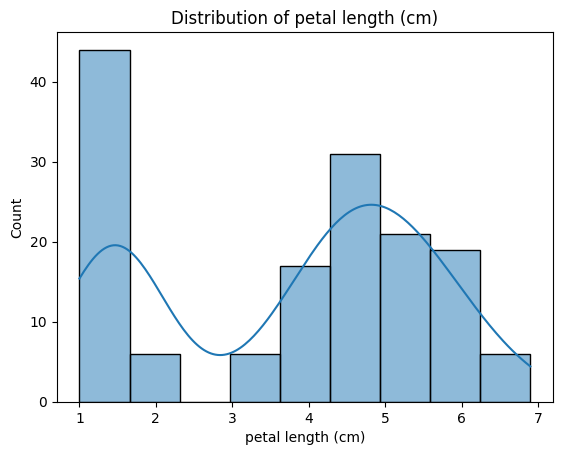

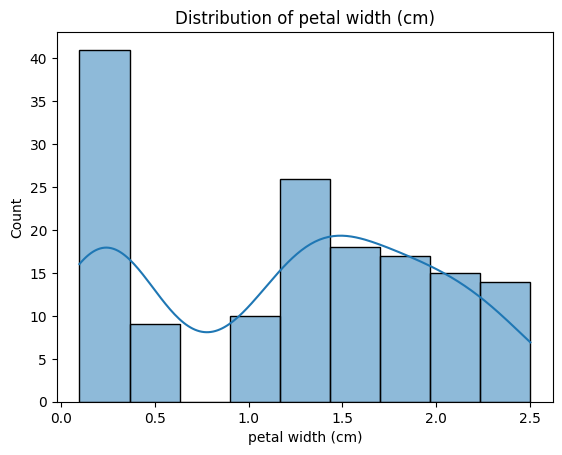

0    50
1    50
2    50
Name: count, dtype: int64


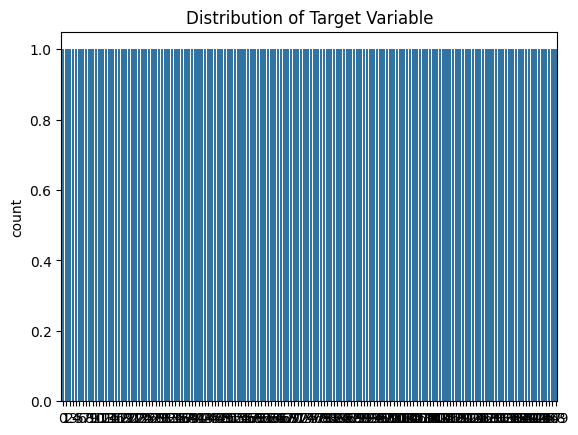

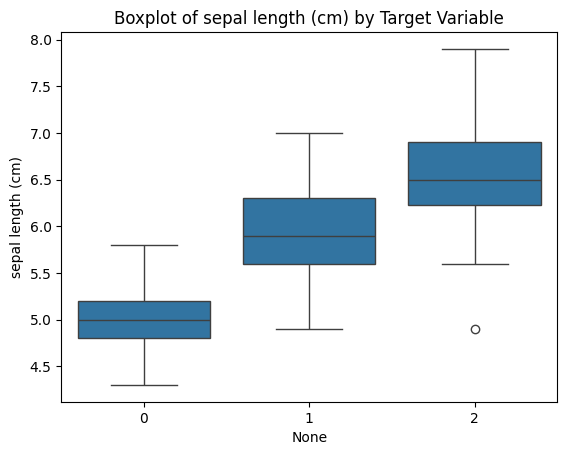

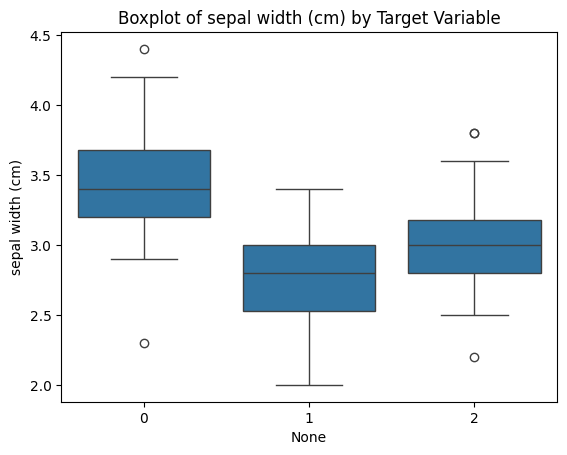

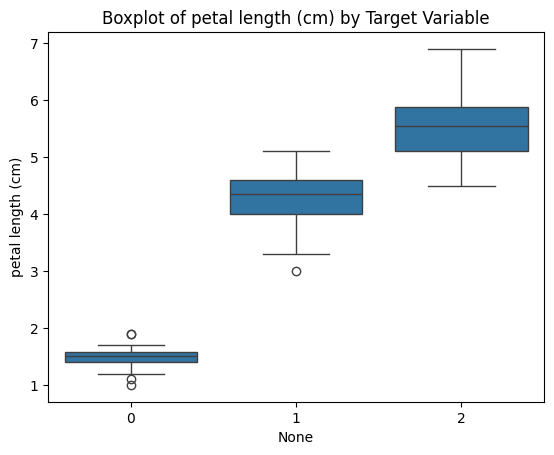

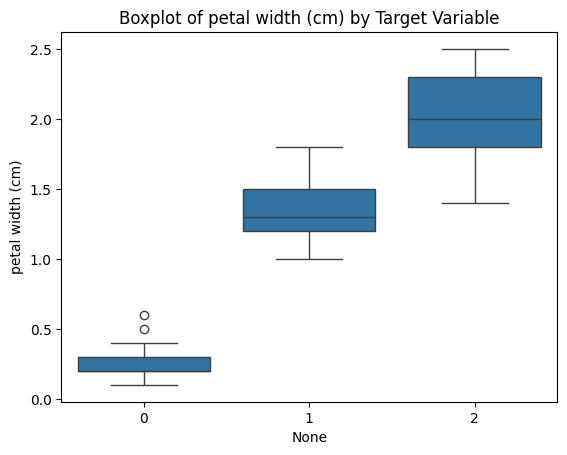

In [3]:
print(X.info())
print(X.describe())

correlation_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

sns.pairplot(X)
plt.show()

for feature in X.columns:
    plt.figure()
    sns.histplot(X[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

print(y.value_counts())
sns.countplot(y)
plt.title('Distribution of Target Variable')
plt.show()

for feature in X.columns:
    plt.figure()
    sns.boxplot(x=y, y=X[feature])
    plt.title(f'Boxplot of {feature} by Target Variable')
    plt.show()

In [4]:
df_std  = (X - X.mean()) / (X.std())
df_std

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.897674,1.015602,-1.335752,-1.311052
1,-1.139200,-0.131539,-1.335752,-1.311052
2,-1.380727,0.327318,-1.392399,-1.311052
3,-1.501490,0.097889,-1.279104,-1.311052
4,-1.018437,1.245030,-1.335752,-1.311052
...,...,...,...,...
145,1.034539,-0.131539,0.816859,1.443994
146,0.551486,-1.278680,0.703564,0.919223
147,0.793012,-0.131539,0.816859,1.050416
148,0.430722,0.786174,0.930154,1.443994


In [5]:
cov_mat = np.cov(df_std.T, bias = 0)
cov_mat

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [6]:
eigen_val, eigen_vectors = np.linalg.eig(cov_mat)

In [7]:
print('Eigen values:', eigen_val)
print('Eigen vectors:\n',eigen_vectors)

Eigen values: [2.91849782 0.91403047 0.14675688 0.02071484]
Eigen vectors:
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [8]:
sorted_indices = np.argsort(eigen_val)[::-1]
eigen_val = eigen_val[sorted_indices]
eigen_vectors = eigen_vectors[:, sorted_indices]

In [9]:
top2_eigen_vectors = eigen_vectors[:, :2]
print("Top eigen vectors:\n",top2_eigen_vectors)

Top eigen vectors:
 [[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


In [10]:
transformed_data = np.matmul(np.array(df_std), top2_eigen_vectors)
principalDf = pd.DataFrame(data = transformed_data
             , columns = ['principal component '+ str(i+1) for i in range(2)])
principalDf

,principal component 1,principal component 2
0,-2.257141,-0.478424
1,-2.074013,0.671883
2,-2.356335,0.340766
3,-2.291707,0.595400
4,-2.381863,-0.644676
...,...,...
145,1.864258,-0.385674
146,1.559356,0.893693
147,1.516091,-0.268171
148,1.368204,-1.007878


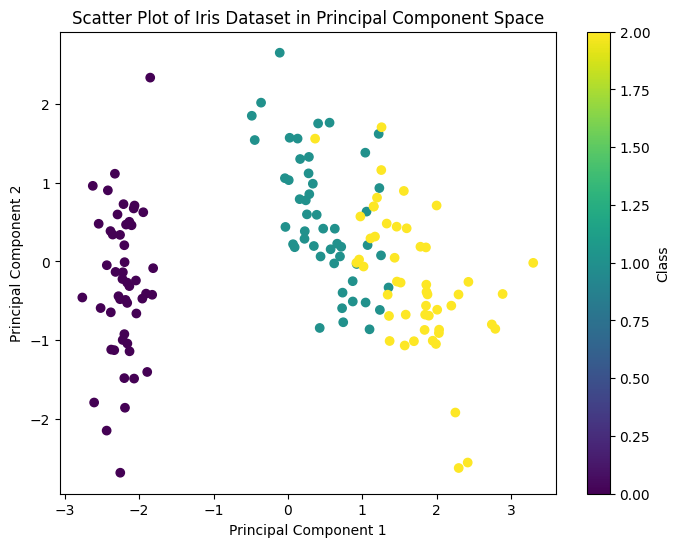

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Iris Dataset in Principal Component Space')
plt.colorbar(label='Class')
plt.show()

# Lab Exercise 2: PCA for Image Compression

In [22]:
from PIL import Image
from sklearn.decomposition import PCA

image = Image.open('/content/drive/MyDrive/Colab Notebooks/Data/image.png').convert('L')
image_array = np.array(image)

rows, cols = image_array.shape

In [23]:
# Flatten the image data
X = image_array.reshape(rows, cols)

# Apply PCA
pca = PCA(n_components=min(X.shape))
X_reduced = pca.fit_transform(X)

# Reconstruct the image
X_reconstructed = pca.inverse_transform(X_reduced)
reconstructed_image_array = X_reconstructed.reshape(rows, cols)
reconstructed_image_array = np.clip(reconstructed_image_array, 0, 255).astype(np.uint8)

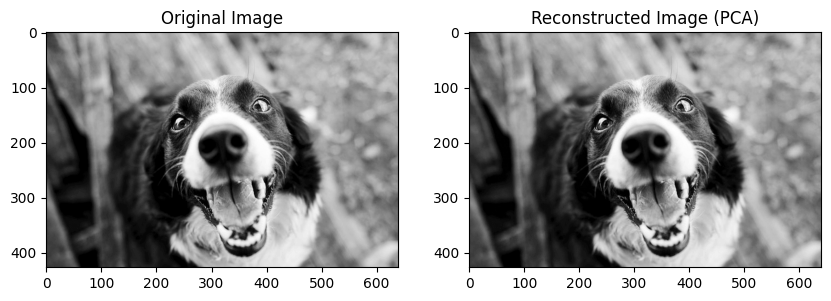

In [24]:
# Display original and reconstructed images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image_array, cmap='gray')
plt.title('Reconstructed Image (PCA)')

plt.show()

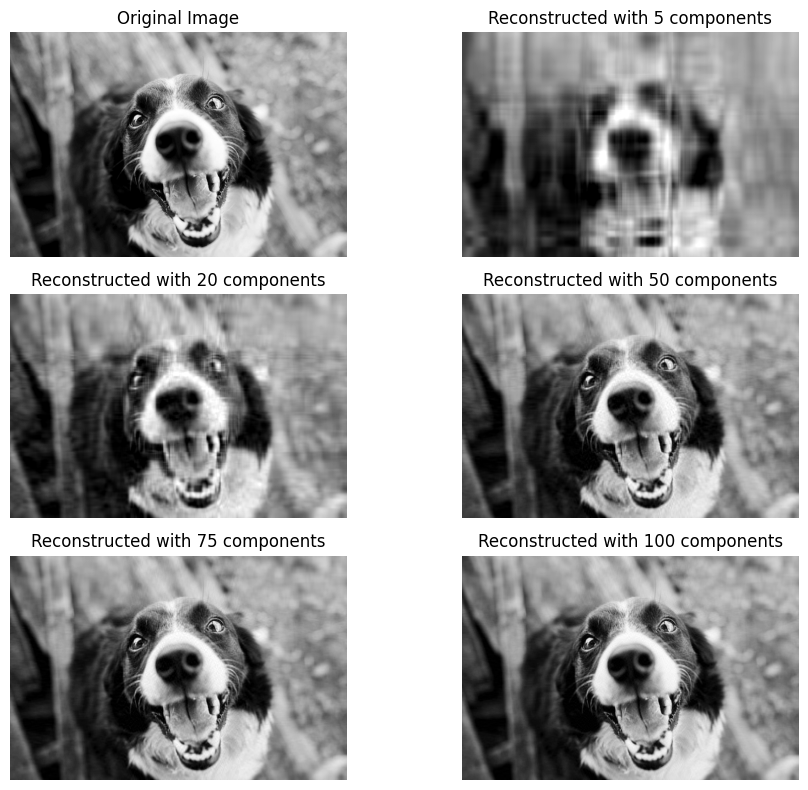

In [25]:
# Define different numbers of principal components to use
n_components_list = [5, 20, 50, 75, 100]
reconstructed_images = []

# Loop through the different numbers of principal components
for n_components in n_components_list:
    # Apply PCA
    pca = PCA(n_components=n_components)
    X_reduced = pca.fit_transform(X)

    # Reconstruct the image
    X_reconstructed = pca.inverse_transform(X_reduced)
    reconstructed_image_array = X_reconstructed.reshape(rows, cols)

    # Ensure pixel values are within the valid range
    reconstructed_image_array = np.clip(reconstructed_image_array, 0, 255).astype(np.uint8)
    reconstructed_images.append(reconstructed_image_array)

# Plotting the original and reconstructed images
plt.figure(figsize=(10, 8))
# Display the original image in the first subplot
plt.subplot(3, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Display reconstructed images for different n_components
for i, n_comp in enumerate(n_components_list):
    plt.subplot(3, 2, i+2)
    plt.imshow(reconstructed_images[i], cmap='gray')
    plt.title(f"Reconstructed with {n_comp} components")
    plt.axis('off')

# Adjust the layout to avoid overlap
plt.tight_layout()
plt.show()

# Lab Exercise 3: PCA for Feature Reduction in a Classification Task

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report

# 1. Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# 2. Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Baseline Model: Train a Logistic Regression model without applying PCA
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
y_pred_baseline = log_reg.predict(X_test)

# Evaluate baseline performance
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
precision_baseline = precision_score(y_test, y_pred_baseline, average='weighted')
recall_baseline = recall_score(y_test, y_pred_baseline, average='weighted')

print(f"Baseline (No PCA) - Accuracy: {accuracy_baseline:.4f}, Precision: {precision_baseline:.4f}, Recall: {recall_baseline:.4f}")
print(classification_report(y_test, y_pred_baseline))

Baseline (No PCA) - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [20]:
# 4. Apply PCA and train models with reduced features
n_components_list = [2, 5, 10, 13]
accuracy_pca = []

for n_components in n_components_list:
    # Apply PCA
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train the Logistic Regression model on the reduced dataset
    log_reg_pca = LogisticRegression(max_iter=10000)
    log_reg_pca.fit(X_train_pca, y_train)

    # Predict and evaluate the model
    y_pred_pca = log_reg_pca.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred_pca)
    accuracy_pca.append(accuracy)

    precision = precision_score(y_test, y_pred_pca, average='weighted')
    recall = recall_score(y_test, y_pred_pca, average='weighted')

    print(f"PCA ({n_components} components) - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")

PCA (2 components) - Accuracy: 0.6852, Precision: 0.6653, Recall: 0.6852
PCA (5 components) - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000
PCA (10 components) - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000
PCA (13 components) - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000


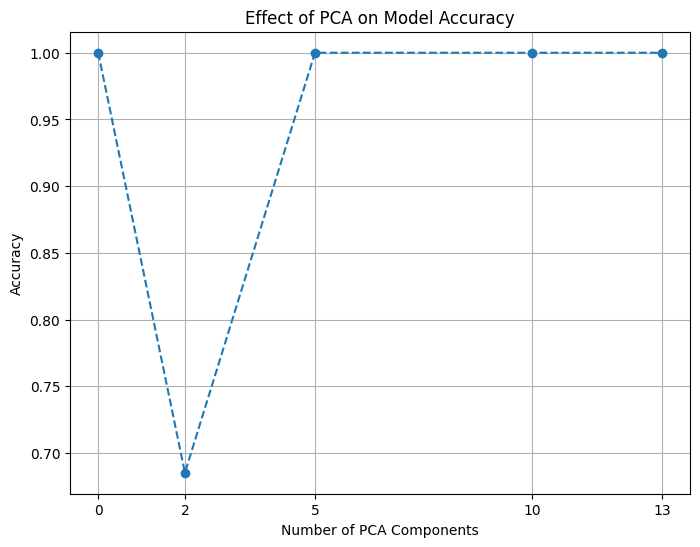

In [19]:
# 6. Visualization: Plot accuracy as a function of the number of components
plt.figure(figsize=(8, 6))
plt.plot([0] + n_components_list, [accuracy_baseline] + accuracy_pca, marker='o', linestyle='--')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.title('Effect of PCA on Model Accuracy')
plt.xticks([0] + n_components_list)  # Adding 0 for the baseline model
plt.grid(True)
plt.show()